<a href="https://colab.research.google.com/github/JSJeong-me/AI-Innovation-2024/blob/main/2-2-yolo-image-crop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 !pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.1/872.1 kB 48.3 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import cv2

# Load the YOLO model
model = YOLO("yolov8s.pt")  # 원하는 크기 모델 입력(n ~ x)

100%|██████████| 21.5M/21.5M [00:00<00:00, 410MB/s]


In [9]:
img = cv2.imread('elephant2.png')[..., ::-1]

In [4]:
type(img)

numpy.ndarray

In [5]:
img.shape

(532, 946, 3)

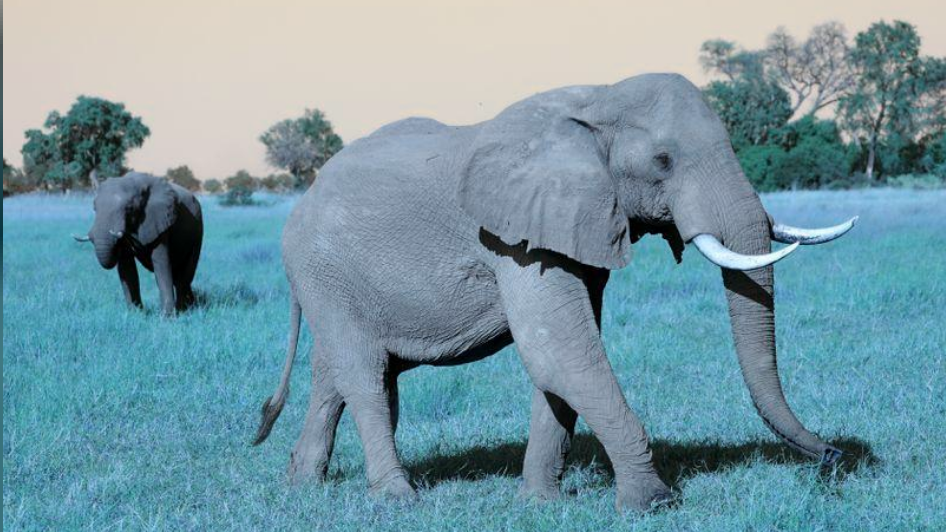

In [10]:
cv2_imshow(img)

In [11]:
# Perform prediction on the image
result = model.predict("./elephant2.png", save=True, conf=0.5)


image 1/1 /content/elephant2.png: 384x640 2 elephants, 39.5ms
Speed: 8.6ms preprocess, 39.5ms inference, 752.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


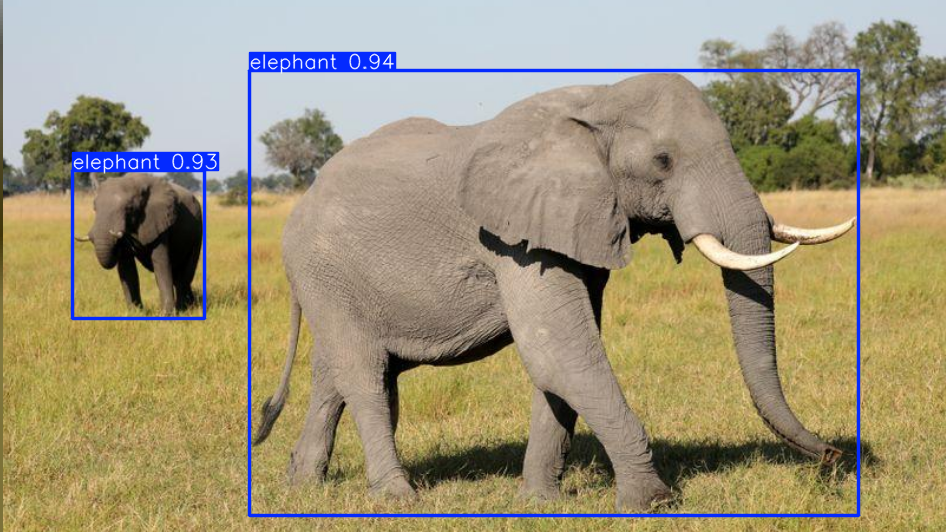

In [12]:
# Plot the results
plots = result[0].plot()

# Display the image using cv2_imshow
cv2_imshow(plots)

# No need to use cv2.waitKey() and cv2.destroyAllWindows() in Google Colab

In [ ]:
model.classes = [1] #

In [ ]:
# model.conf = 0.6

In [13]:
result = model.predict("./elephant2.png", save=True, conf=0.5)


image 1/1 /content/elephant2.png: 384x640 2 elephants, 11.0ms
Speed: 2.3ms preprocess, 11.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


In [ ]:
result

In [14]:
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import cv2

# Load the YOLO model
model = YOLO("yolov8s.pt")  # Load the YOLOv8 model (small version in this case)

# Perform prediction on an image
result = model.predict("./elephant2.png", save=True, conf=0.5)

# Access the first result (assuming a single image was processed)
detections = result[0]


image 1/1 /content/elephant2.png: 384x640 2 elephants, 11.5ms
Speed: 1.7ms preprocess, 11.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2


In [15]:
detections = result[0]

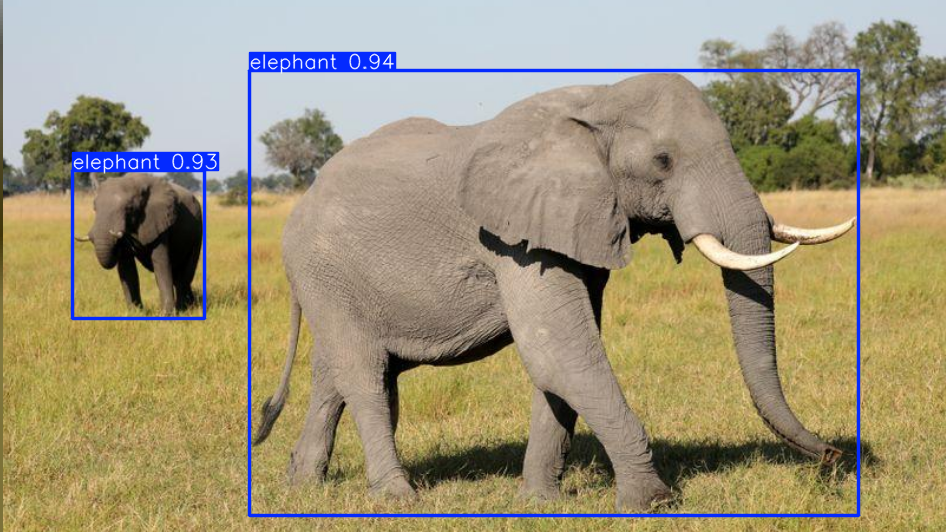

In [16]:
# Display the image with the detected objects
plots = detections.plot()
cv2_imshow(plots)

In [18]:
detections.boxes.xyxy[0]

tensor([249.6587,  70.3345, 858.1132, 515.5802], device='cuda:0')

In [19]:
detections.boxes.xyxy[1]

tensor([ 72.3832, 170.4515, 204.9643, 318.4759], device='cuda:0')

In [20]:
# Indexing detections
# Accessing bounding boxes, class ids, and confidence scores
for idx, (box, cls, conf) in enumerate(zip(detections.boxes.xyxy, detections.boxes.cls, detections.boxes.conf)):
    print(f"Detection {idx+1}:")
    print(f"  Bounding Box: {box}")
    print(f"  Class ID: {cls}")
    print(f"  Confidence: {conf}")
    print()

# If you want to retrieve specific data:
# Bounding box coordinates (xmin, ymin, xmax, ymax) of the first detection
bbox_first = detections.boxes.xyxy[0]
print(f"First Bounding Box: {bbox_first}")

Detection 1:
  Bounding Box: tensor([249.6587,  70.3345, 858.1132, 515.5802], device='cuda:0')
  Class ID: 20.0
  Confidence: 0.9364514946937561

Detection 2:
  Bounding Box: tensor([ 72.3832, 170.4515, 204.9643, 318.4759], device='cuda:0')
  Class ID: 20.0
  Confidence: 0.9339244961738586

First Bounding Box: tensor([249.6587,  70.3345, 858.1132, 515.5802], device='cuda:0')


In [21]:
# Class ID of the first detection
class_first = detections.boxes.cls[0]
print(f"First Class ID: {class_first}")

# Confidence score of the first detection
confidence_first = detections.boxes.conf[0]
print(f"First Confidence Score: {confidence_first}")


First Class ID: 20.0
First Confidence Score: 0.9364514946937561


In [22]:
detections.boxes.xyxy[0]

tensor([249.6587,  70.3345, 858.1132, 515.5802], device='cuda:0')

In [23]:
import torch

# 주어진 텐서
tensor_values = torch.tensor([249.6587,  70.3345, 858.1132, 515.5802], device='cuda:0')

# 텐서를 CPU로 이동하고 NumPy 배열로 변환
numpy_array = tensor_values.cpu().numpy()

# 결과 출력
print(numpy_array)


[     249.66      70.335      858.11      515.58]


In [ ]:
detections.boxes.xyxy[1]

tensor([ 72.3832, 170.4515, 204.9643, 318.4759], device='cuda:0')

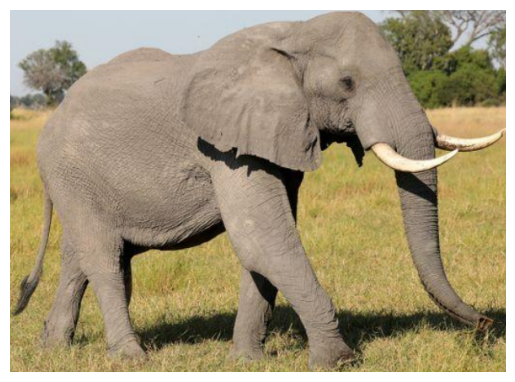

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image from the file path
image_path = './elephant2.png'
image = cv2.imread(image_path)

# Convert the image from BGR (OpenCV default) to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Coordinates for the region of interest
coords = np.array([249.66, 70.335, 858.11, 515.58]).astype(int)
x1, y1, x2, y2 = coords

# Crop the region from the image
cropped_image = image_rgb[y1:y2, x1:x2]

# Display the cropped region
plt.imshow(cropped_image)
plt.axis('off')  # Hide axes
plt.show()
